In [1]:
#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind')

#modules
import wrangle

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_org = wrangle.get_curriculum_data()
df_org.head()

Returning saved csv files.


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java


In [3]:
df_org.shape

(900223, 16)

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          900223 non-null  object 
 1   time          900223 non-null  object 
 2   path          900222 non-null  object 
 3   user_id       900223 non-null  int64  
 4   cohort_id     847330 non-null  float64
 5   ip            900223 non-null  object 
 6   id            847330 non-null  float64
 7   name          847330 non-null  object 
 8   slack         847330 non-null  object 
 9   start_date    847330 non-null  object 
 10  end_date      847330 non-null  object 
 11  created_at    847330 non-null  object 
 12  updated_at    847330 non-null  object 
 13  deleted_at    0 non-null       float64
 14  program_id    847330 non-null  float64
 15  program_name  900223 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 109.9+ MB


In [26]:
(df_org.user_id.value_counts() < 200).mean()

0.2640163098878695

##### Basic Date info

In [19]:
print(f'The starting date is {df.date.min()}\nThe ending date is {df.date.max()}')

The starting date is 2018-01-26
The ending date is 2021-04-21


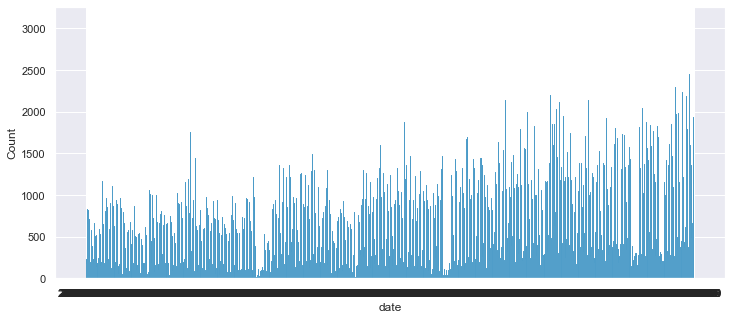

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_org,x='date',bins=40); #40 bins b/c ~40 months

### Question 5: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [5]:
#Filter dataset down to just those that access it after graduation
df = df_org[df_org.date > df_org.end_date]

In [6]:
df.shape

(199834, 16)

In [7]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
30,2018-01-26,10:14:47,/,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php


In [8]:
df.path.nunique() #only 1865 unique

1865

##### Let's grab ds only post grad visits

In [9]:
df.program_name.unique()

array(['full_stack_php', 'full_stack_java', 'front_end', 'data_science'],
      dtype=object)

In [10]:
ds_df = df[(df.program_name == 'data_science')]

In [11]:
ds_df.shape

(11495, 16)

In [12]:
ds_df.path.value_counts() #437

/                                           1436
search/search_index.json                     493
sql/mysql-overview                           275
classification/overview                      266
classification/scale_features_or_not.svg     219
                                            ... 
DataToAction_v2.jpg                            1
advanced-topics/tidy-data                      1
10-anomaly-detection/isolation-forests         1
cli/moving-files                               1
individual-project/individual-project          1
Name: path, Length: 437, dtype: int64

In [13]:
ds_df.name.value_counts()

Bayes     4722
Curie     3621
Darden    3152
Name: name, dtype: int64

<AxesSubplot:xlabel='name', ylabel='Count'>

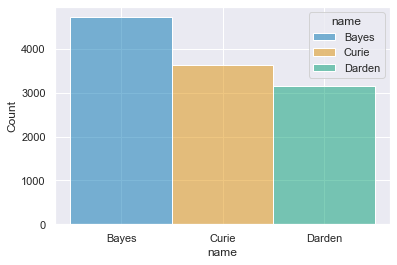

In [14]:
sns.histplot(data=ds_df,x='name',hue='name')

**DS Post Graduation Visit Summary:**
- 11495 page visits across 3 cohorts.
- 

In [15]:
post_graduation_visits = df.path.value_counts()

In [16]:
post_graduation_visits.head(10)

/                           15524
javascript-i                 4965
spring                       4262
search/search_index.json     4174
html-css                     3678
java-iii                     3537
java-ii                      3439
java-i                       3123
appendix                     3071
javascript-ii                2978
Name: path, dtype: int64

In [17]:
post_graduation_visits.index.str.split(pat='/')

Index([                                                              ['', ''],
                                                             ['javascript-i'],
                                                                   ['spring'],
                                              ['search', 'search_index.json'],
                                                                 ['html-css'],
                                                                 ['java-iii'],
                                                                  ['java-ii'],
                                                                   ['java-i'],
                                                                 ['appendix'],
                                                            ['javascript-ii'],
       ...
                                     ['javascript-ii', 'promisesdfghjkjhgfs'],
                                                  ['9_Appendix_TSAD_Lesson3'],
                                         

**Question 6 Notes:**
- visits to "/" are just entry points, so we can ignore that


### Idea Fairies
- Subset into cohort and create activity plot for each cohort (see how activity after graduation varies)